# Titanic: Machine Learning from Disaster

## Imports

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Read the data

In [353]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Explore the data

### Get first look of the data

In [354]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [355]:
print(train.columns)
train.sample(10)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.500,NaN,S
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,NaN,C
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.750,NaN,Q
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.425,C86,C
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.000,B96 B98,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.750,NaN,Q
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,NaN,C
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.000,NaN,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.925,NaN,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.400,NaN,C


### Missing values

In [356]:
print('percentage of missing values in Age: {0}%'.format(round(train['Age'].isnull().sum()/train.shape[0] * 100, 2)))
print('percentage of missing values in Cabin: {0}%'.format(round(train['Cabin'].isnull().sum()/train.shape[0] * 100, 2)))
print('percentage of missing values in Embarked: {0}%'.format(round(train['Embarked'].isnull().sum()/train.shape[0] * 100, 2)))

percentage of missing values in Age: 19.87%
percentage of missing values in Cabin: 77.1%
percentage of missing values in Embarked: 0.22%


There are many missing values in Age and Cabin columns

### Visualizations

bar_chart will take a feature name as argument and create a barchart with the Survived attribute

In [357]:
def bar_chart(feature):
    sns.barplot(x=feature, y="Survived", data=train)
    plt.show()

male      577
female    314
Name: Sex, dtype: int64


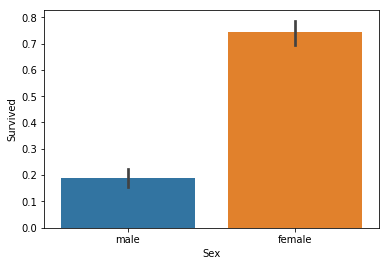

In [358]:
print(train['Sex'].value_counts())
bar_chart('Sex')

There were more men than women on the ship, but a sufficiently larger proportion of women survived. So it is more likely for a woman to survive than a man

3    491
1    216
2    184
Name: Pclass, dtype: int64


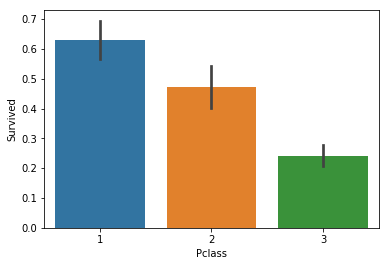

In [359]:
print(train['Pclass'].value_counts())
bar_chart('Pclass')

1st class passengers are more likely to survive than others 

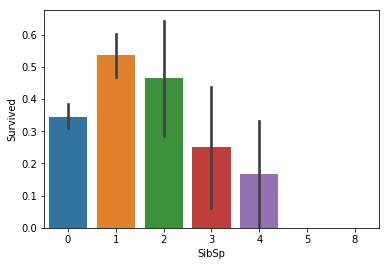

In [360]:
bar_chart('SibSp')

From the graph, it looks like a person with 1 or 2 siblings/spouses are more likely to survive than a person with none or more than 2

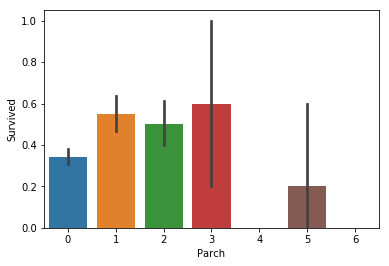

In [361]:
bar_chart('Parch')

It looks like a person having children or parents on board had a higher likelihood of survival compare to people travelling alone. However, a person with 4 or more children or parents aboard most likely died

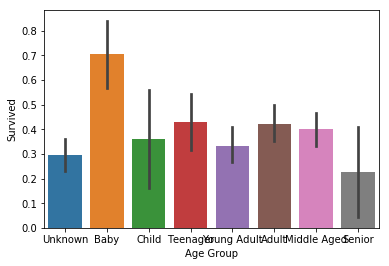

In [362]:
#fill unknown age values with -0.5
train['Age'].fillna(-0.5, inplace=True)
test['Age'].fillna(-0.5, inplace=True)


bins = [-1, 0, 5, 12, 18, 25, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']

train['Age Group'] = pd.cut(train['Age'], bins, labels=labels)
test['Age Group'] = pd.cut(test['Age'], bins, labels=labels)

sns.barplot(x='Age Group', y='Survived', data=train)
plt.show()

Babies have the highest chance of survival and seniors have the lowest

In [363]:
train['CabinBool'] = train['Cabin'].notnull().astype('int')
test['CabinBool'] = test['Cabin'].notnull().astype('int')

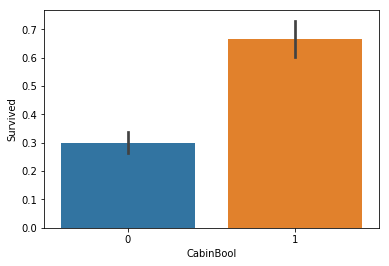

In [364]:
sns.barplot(x='CabinBool', y='Survived', data=train)
plt.show()

People with cabins are most likely of higher socio-econmic class and therefore are more likely to survive. 65% of people with cabins survived compared to about 30% without

## Clean the data

In [365]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Oxenham, Mr. Percy Thomas",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Middle Aged,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,94,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


### Cabin feature

We can drop the cabin feature as no more useful information can be gathered from it

In [366]:
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

### Embarked feature

In [367]:
print(train['Embarked'].isnull().sum())
print(test['Embarked'].isnull().sum())

2
0


In [368]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Fill the 2 null values with the most frequent value

In [369]:
train['Embarked'].fillna(value='S', inplace=True)

### Ticket feature

We can also drop the ticket column as ticket number is unlikely to give any useful information

In [370]:
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

### Age feature

Since majority of the values are missing, it wouldn't be useful to fill them with the same value. We can find a better mechanism to predict age

In [371]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

A new feature called Title is added by extracting the titles from the names using regex

In [372]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


There are only a few people with less common names so they can be grouped together as Rare. Some of the other titles can be replaced with more common titles

In [373]:
train['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev'], 'Rare', inplace=True)
test['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Dona'], 'Rare', inplace=True)

train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal', inplace=True)
test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal', inplace=True)

train['Title'].replace(['Mlle', 'Mme', 'Ms'], 'Miss', inplace=True)
test['Title'].replace(['Mlle', 'Mme', 'Ms'], 'Miss', inplace=True)

In [374]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,186,0
Mr,0,517
Mrs,125,0
Rare,1,19
Royal,2,1


Find the most common Age Group for each title

In [375]:
master_age_group = train[train['Title'] == 'Master']['Age Group'].value_counts().idxmax()
miss_age_group = train[train['Title'] == 'Miss']['Age Group'].value_counts().idxmax()
mr_age_group = train[train['Title'] == 'Mr']['Age Group'].value_counts().idxmax()
mrs_age_group = train[train['Title'] == 'Mrs']['Age Group'].value_counts().idxmax()
rare_age_group = train[train['Title'] == 'Rare']['Age Group'].value_counts().idxmax()
royal_age_group = train[train['Title'] == 'Royal']['Age Group'].value_counts().idxmax()

Impute unknown age groups with the most common age group for each title

In [376]:
def impute_age_group(record):
    if record['Age Group'] == 'Unknown':
        if record['Title'] == 'Master':
            return master_age_group
        elif record['Title'] == 'Miss':
            return miss_age_group
        elif record['Title'] == 'Mr':
            return mr_age_group
        elif record['Title'] == 'Mrs':
            return mrs_age_group
        elif record['Title'] == 'Rare':
            return  rare_age_group
        else:
            return  royal_age_group
    else:
        return record['Age Group']

train['Age Group'] = train.apply(impute_age_group, axis=1)
test['Age Group'] = train.apply(impute_age_group, axis=1)

There is a missing Fare feature in the test set, so we impute it using the mean fare value for that pclass

In [377]:
pclass = test['Pclass'][test['Fare'].isna()]
fares = test['Fare'][test['Pclass'] == pclass.iloc[0]]

In [378]:
test['Fare'].fillna(fares.mean(), inplace=True)
test['Fare'].isna().sum()

0

Assign the Fare feature into categorical fare ranges

In [379]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

We can drop the Name, Age, Fare, and Title features since they are not required anymore

In [380]:
train.drop(['Name', 'Age', 'Fare', 'Title'], axis=1, inplace=True)
test.drop(['Name', 'Age', 'Fare', 'Title'], axis=1, inplace=True)

In [381]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age Group,CabinBool,FareBand
73,74,0,3,male,1,0,C,Adult,0,2
387,388,1,2,female,0,0,S,Middle Aged,0,2
208,209,1,3,female,0,0,Q,Teenager,0,1
640,641,0,3,male,0,0,S,Young Adult,0,1
347,348,1,3,female,1,0,S,Middle Aged,0,3
157,158,0,3,male,0,0,S,Adult,0,2
261,262,1,3,male,4,2,S,Baby,0,4
461,462,0,3,male,0,0,S,Adult,0,2
123,124,1,2,female,0,0,S,Adult,1,2
586,587,0,2,male,0,0,S,Middle Aged,0,3


We will change the nominal variables to discrete

In [382]:
#Sex
sex_mapping = {'female': 0, 'male': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

#Embarked
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

#Age Group
age_group_mapping = {'Adult': 0, 'Middle Aged': 1, 'Young Adult': 2, 'Teenager': 3, 'Baby': 4, 'Child': 5, 'Senior': 6}
train['Age Group'] = train['Age Group'].map(age_group_mapping)
test['Age Group'] = test['Age Group'].map(age_group_mapping)

In [383]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age Group,CabinBool,FareBand
190,191,1,2,0,0,0,0,0,0,2
615,616,1,2,0,1,2,0,2,0,4
296,297,0,3,1,0,0,1,2,0,1
191,192,0,2,1,0,0,0,2,0,2
580,581,1,2,0,1,1,0,2,0,3
329,330,1,1,0,0,1,1,3,1,4
90,91,0,3,1,0,0,0,0,0,2
857,858,1,1,1,0,0,0,1,1,3
182,183,0,3,1,4,2,0,5,0,4
512,513,1,1,1,0,0,0,1,1,3


## Model Selection

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = train.drop(['PassengerId', 'Survived'], axis=1)
target = train['Survived']

x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)

### Decision Tree

In [385]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc_dt = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Decision Tree Accuracy:', acc_dt)

Decision Tree Accuracy: 81.72


### Random Forest

In [386]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=4)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
acc_rf = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Random Forest Accuracy:', acc_rf)

Random Forest Accuracy: 81.72


### KNN

In [387]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print('KNN Accuracy:', acc_knn)

KNN Accuracy: 79.48


## Predictions

In [388]:
x_train = train.drop(['PassengerId', 'Survived'], axis=1)
y_train = train['Survived']


model = RandomForestClassifier()
model.fit(x_train, y_train)


#set ids as PassengerId and predict survival 
ids = test['PassengerId']
x_test = test.drop(['PassengerId'], axis=1)
y_pred = model.predict(x_test)

In [389]:
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': y_pred })
output.to_csv('output/submission.csv', index=False)